In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#Random Data Generator

def normal_data_generate(num_data,mean,var):
    L = np.zeros((num_data))
    for i in range(num_data):
        unif_value = np.random.uniform(0, 1, 12)
        L[i] = (sum(unif_value)-6)
    return math.sqrt(var)*L + mean

def linear_model(n,a,w):
    feat = np.zeros((n,1))
    x = np.random.uniform(-1, 1, 1)[0]
    pow = 1
    value = 0
    for i in range(n):
        feat[i][0] = pow
        value += w[i]*pow
        pow *= x

    e = normal_data_generate(1,0,a)[0]
    return x, (value + e) , feat

def plot_fig(ground_mean, w, n, var, ten_mean, ten_var, fifty_mean, fifty_var, data_x, data_y, a):
    x = np.linspace(-2, 2, 100)
    y_mean = np.zeros(100)
    y_add_var = np.zeros(100)
    y_min_var = np.zeros(100)
    t = np.ones((100))
    feat_x = np.ones((100,n))

    for i in range(100):
        for j in range(1,n):
            feat_x[i][j] = feat_x[i][j-1]*x[i]

    for i in range(n):
        y_mean += ground_mean[i]*t
        t *= x

    for i in range(100):
        y_add_var[i] = y_mean[i] + a
        y_min_var[i] = y_mean[i] - a

    # 繪製曲線
    # 創建四個子圖
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0][0].set_xlim(-2, 2)
    axs[0][0].set_ylim(-15, 20)
    axs[0][0].plot(x, y_mean, color='k')
    axs[0][0].plot(x, y_add_var, color='r')
    axs[0][0].plot(x, y_min_var, color='r')
    axs[0][0].set_title('Ground Truth')

    y_mean = np.zeros(100)
    y_add_var = np.zeros(100)
    y_min_var = np.zeros(100)
    t = np.ones((100))
    w_add_var = np.array(ten_mean)
    w_min_var = np.array(ten_mean)

    for i in range(n):
        y_mean += w[i]*t
        t *= x

    for i in range(100):
        y_add_var[i] = y_mean[i] + a + feat_x[i].dot(var).dot(feat_x[i].T)
        y_min_var[i] = y_mean[i] - a - feat_x[i].dot(var).dot(feat_x[i].T)


    axs[0][1].set_xlim(-2, 2)
    axs[0][1].set_ylim(-15, 20)
    axs[0][1].plot(x, y_mean, color='k')
    axs[0][1].plot(x, y_add_var, color='r')
    axs[0][1].plot(x, y_min_var, color='r')
    axs[0][1].scatter(data_x, data_y, color='b')
    axs[0][1].set_title('Predict results')

    y_mean = np.zeros(100)
    y_add_var = np.zeros(100)
    y_min_var = np.zeros(100)
    t = np.ones((100))
    w_add_var = np.array(ten_mean)
    w_min_var = np.array(ten_mean)

    for i in range(n):
        y_mean += ten_mean[i]*t
        t *= x

    for i in range(100):
        y_add_var[i] = y_mean[i] + a + feat_x[i].dot(ten_var).dot(feat_x[i].T)
        y_min_var[i] = y_mean[i] - a - feat_x[i].dot(ten_var).dot(feat_x[i].T)

    axs[1][0].set_xlim(-2, 2)
    axs[1][0].set_ylim(-15, 20)
    axs[1][0].plot(x, y_mean, color='k')
    axs[1][0].plot(x, y_add_var, color='r')
    axs[1][0].plot(x, y_min_var, color='r')
    axs[1][0].scatter(data_x[0:11], data_y[0:11], color='b')
    axs[1][0].set_title('After 10 incomes')

    y_mean = np.zeros(100)
    y_add_var = np.zeros(100)
    y_min_var = np.zeros(100)
    t = np.ones((100))
    w_add_var = np.array(fifty_mean)
    w_min_var = np.array(fifty_mean)
    for i in range(n):
        y_mean += fifty_mean[i]*t
        t *= x

    for i in range(100):
        y_add_var[i] = y_mean[i] + a + feat_x[i].dot(fifty_var).dot(feat_x[i].T)
        y_min_var[i] = y_mean[i] - a - feat_x[i].dot(fifty_var).dot(feat_x[i].T)

    axs[1][1].set_xlim(-2, 2)
    axs[1][1].set_ylim(-15, 20)
    axs[1][1].plot(x, y_mean, color='k')
    axs[1][1].plot(x, y_add_var, color='r')
    axs[1][1].plot(x, y_min_var, color='r')
    axs[1][1].scatter(data_x[0:51], data_y[0:51], color='b')
    axs[1][1].set_title('After 50 incomes')

    fig.show()

In [4]:
5#Sequential Estimator

mean = float(input("Input the \"mean\" of the Univariate Gaussian: "))
var = float(input("Input the \"variance\" of the Univariate Gaussian: "))
cur_mean = normal_data_generate(1, mean, var)[0]
cur_mean_square = cur_mean**2
cur_var = cur_mean_square - cur_mean**2
eps = 1e-2
num_data = 1
result = open("result_1.txt", 'w')
result.write(f"Data point source function: N({mean}, {var}) \n")
result.write(f"Add data point: {cur_mean:.15f}\n")
result.write(f"Mean = {cur_mean:.15f} Variance = {cur_var:.15f} \n")

while abs(mean-cur_mean) > eps or abs(var-cur_var) > eps :
    new_data = normal_data_generate(1, mean, var)[0]
    cur_mean = (cur_mean * num_data + new_data)/(num_data+1)
    cur_mean_square = (cur_mean_square * num_data + new_data**2)/(num_data+1)
    cur_var = cur_mean_square - cur_mean**2
    num_data += 1
    result.write(f"Add data point: {new_data:.15f}\n")
    result.write(f"Mean = {cur_mean:.15f} Variance = {cur_var:.15f} \n")

result.close()

Input the "mean" of the Univariate Gaussian: 3.0
Input the "variance" of the Univariate Gaussian: 5.0


Enter the values in the format 'b = ?, n = ?, a = ?, w = [w_0, ... , w_n]': b = 1, n = 3, a = 3, w = [1, 2, 3]


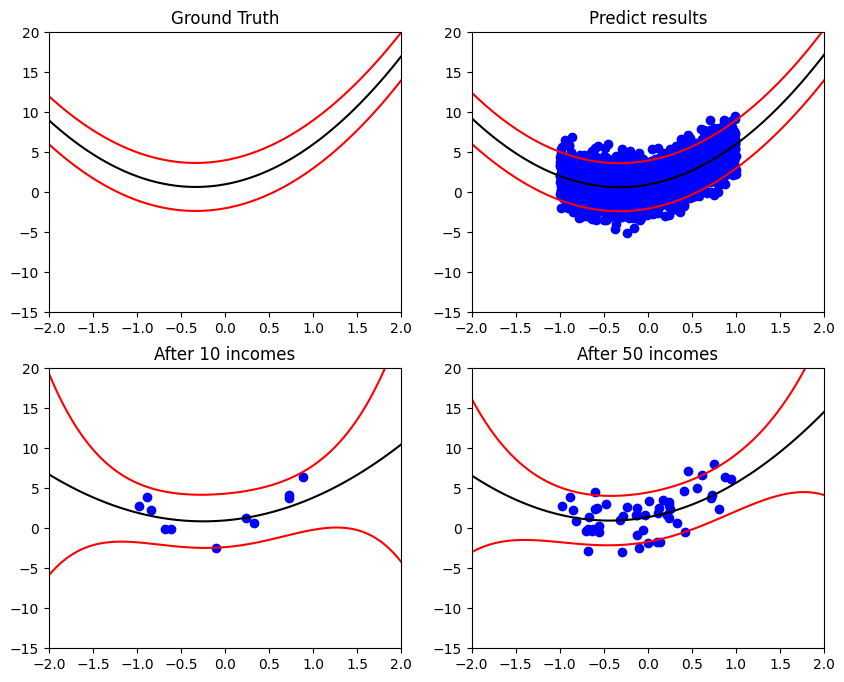

In [9]:
##Baysian Linear regression

input_string = input("Enter the values in the format 'b = ?, n = ?, a = ?, w = [w_0, ... , w_n]': ")
input_list = input_string.split(", ")
b, n, a, w = 0, 0, 0, []
eps = 1e-1
# Iterating through the input list
for item in input_string.split(", ")[0:3]:
    key, value = item.split(" = ")
    if key == 'b':
        b = int(value)
    elif key == 'n':
        n = int(value)
    elif key == 'a':
        a = int(value)
input_string = input_string.split("w = ")[1]
w = list(map(int, input_string[1:len(input_string)-1].split(', ')))

eps = 1e-6
mean = np.zeros((len(w),1))
var = np.eye(len(w))*(1/b)

data_x = []
data_y = []
ground_mean = np.array(w)
ten_mean = np.ones((len(w),1))
ten_var = np.eye(len(w))
fifty_mean = np.ones((len(w),1))
fifty_var = np.eye(len(w))
result = open("result_2.txt", 'w')
error = 1
pred_mean = 0.0
pred_var = 0.0

while error > eps:
    x, y, feat = linear_model(n,a,w)
    data_x.append(x)
    data_y.append(y)
    result.write("Add data point ({}, {}): \n\n".format(x,y))
    result.write("Postirior mean:\n")
    temp = (1/a)*(feat.dot(feat.T)) + np.linalg.inv(var)
    mean = np.linalg.inv(temp).dot(((y/a)*feat + np.linalg.inv(var).dot(mean)))
    var_ = np.linalg.inv(temp)

    for i in range(mean.shape[0]):
        result.write('{:15.10f}\n'.format(mean[i][0]))
    result.write("\nPosterior variance:\n")
    for i in range(var_.shape[0]):
        for j in range(var_.shape[1]):
            result.write('{:15.10f}, '.format(var_[i][j]))
        result.write('\n')

    #predict_normal
    pred_mean = feat.T.dot(mean)[0][0]
    new_var = 1/a + feat.T.dot(var_).dot(feat)[0][0]
    err = abs(new_var - pred_var)
    pred_var = new_var

    result.write(f"\nPredictive distribution ~ N({pred_mean:.5f}, {pred_var:.5f})\n\n")

    error = np.max(abs(var_ - var))
    var = var_

    if len(data_x) == 10:
        ten_mean = np.array(mean)
        ten_var = np.array(var)
    if len(data_x) == 50:
        fifty_mean = np.array(mean)
        fifty_var = np.array(var)

plot_fig(ground_mean, mean, n ,var, ten_mean, ten_var, fifty_mean, fifty_var, data_x, data_y, a)
result.close()